In [1]:
from scipy import signal
from scipy.fftpack import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from utils import fourier, mixed_sine, fir_taps
import pdb
import warnings
warnings.filterwarnings("ignore")

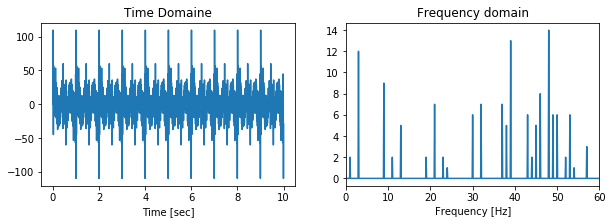

In [2]:
t_min = 0
t_max = 10
fs = 1000
t = np.arange(t_min, t_max, 1/fs)
freqs = [np.random.randint(1, 60) for _ in range(30)]

sig = mixed_sine(freqs, t)
sigX, freqs = fourier(sig, fs)

f, a  = plt.subplots(1, 2, figsize=(10, 3))
a[0].plot(t, sig)
a[0].set_title('Time Domaine')
a[0].set_xlabel('Time [sec]')
a[1].plot(freqs, 2 * np.abs(sigX))
a[1].set_xlim([0, 60])
a[1].set_title('Frequency domain')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

In [3]:
def filter_sig(freqs, fs, filter_type, order=None):
    if (not isinstance(freqs, list)) and (not isinstance(freqs, tuple)):
        freqs = [freqs]
    if order is None:
        order = int(fir_taps(5, fs, freqs[0]))
    nyq = np.round(fs/ 2)
    freqs = np.array(freqs) / nyq
    if filter_type == 'bandpass':
        kernel = signal.firwin(order, freqs, pass_zero=False)
    elif filter_type == 'lowpass':
        kernel = signal.firwin(order, freqs, pass_zero=True)
    elif filter_type =='highpass':
        kernel = signal.firwin(order, freqs, pass_zero=False)
    kX, kf = fourier(kernel, fs)
    return kernel, kX, kf
   

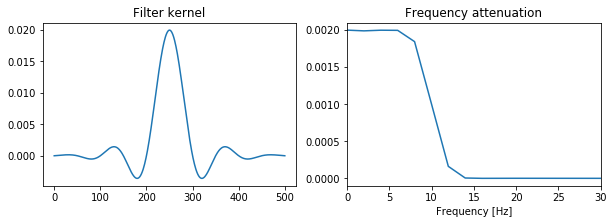

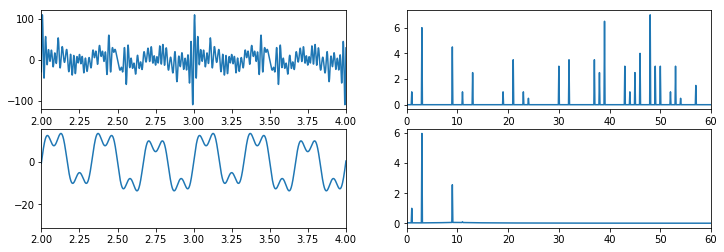

In [4]:
# lowpass

low = 10
kernel, kX, kf = filter_sig(low, fs, filter_type='lowpass')
f, a = plt.subplots(1, 2, figsize=(10, 3))

a[0].plot(kernel)
a[0].set_title('Filter kernel')
a[1].plot(kf, np.abs(kX))
a[1].set_xlim([0, 30])
a[1].set_title('Frequency attenuation')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

filtered = signal.filtfilt(kernel, 1, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, a = plt.subplots(2, 2, figsize=(12, 4))
a[0, 0].plot(t, sig)
a[0, 0].set_xlim([2, 4])
a[1, 0].plot(t, filtered)
a[1, 0].set_xlim([2, 4])

a[0, 1].plot(freqs, np.abs(sigX))
a[0, 1].set_xlim([0, 60])
a[1, 1].plot(filtered_f, np.abs(filteredX))
a[1, 1].set_xlim([0, 60])
plt.show()

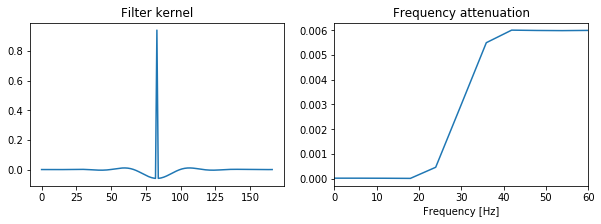

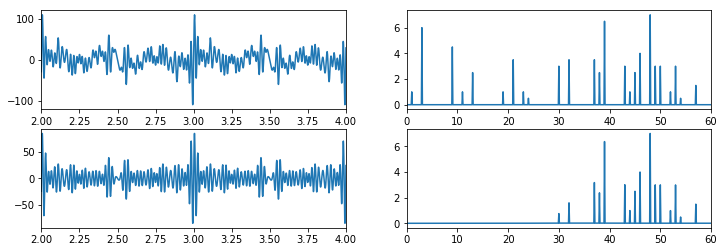

In [5]:
# highpass

freq = 30
kernel, kX, kf = filter_sig(freq, fs, filter_type='highpass')
f, a = plt.subplots(1, 2, figsize=(10, 3))

a[0].plot(kernel)
a[0].set_title('Filter kernel')
a[1].plot(kf, np.abs(kX))
a[1].set_xlim([0, 60])
a[1].set_title('Frequency attenuation')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

filtered = signal.filtfilt(kernel, 1, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, a = plt.subplots(2, 2, figsize=(12, 4))
a[0, 0].plot(t, sig)
a[0, 0].set_xlim([2, 4])
a[1, 0].plot(t, filtered)
a[1, 0].set_xlim([2, 4])

a[0, 1].plot(freqs, np.abs(sigX))
a[0, 1].set_xlim([0, 60])
a[1, 1].plot(filtered_f, np.abs(filteredX))
a[1, 1].set_xlim([0, 60])
plt.show()

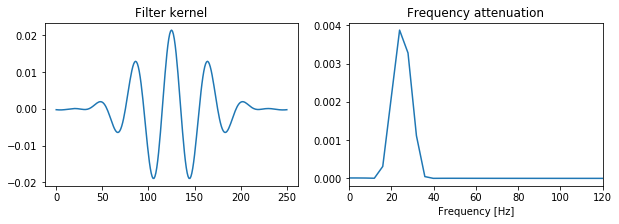

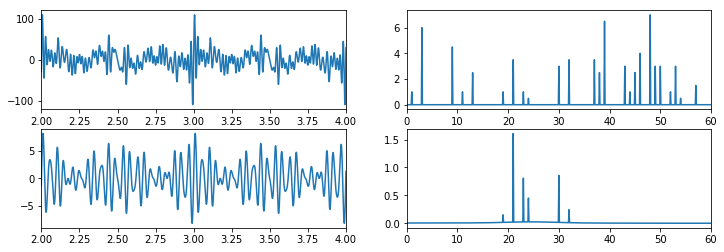

In [7]:
# bandpass

freqs = [20, 30]
kernel, kX, kf = filter_sig(freqs, fs, filter_type='bandpass')
f, a = plt.subplots(1, 2, figsize=(10, 3))

a[0].plot(kernel)
a[0].set_title('Filter kernel')
a[1].plot(kf, np.abs(kX))
a[1].set_xlim([0, 120])
a[1].set_title('Frequency attenuation')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

filtered = signal.filtfilt(kernel, 1, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, a = plt.subplots(2, 2, figsize=(12, 4))
a[0, 0].plot(t, sig)
a[0, 0].set_xlim([2, 4])
a[1, 0].plot(t, filtered)
a[1, 0].set_xlim([2, 4])

a[0, 1].plot(freqs, np.abs(sigX))
a[0, 1].set_xlim([0, 60])
a[1, 1].plot(filtered_f, np.abs(filteredX))
a[1, 1].set_xlim([0, 60])
plt.show()